In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler


project_path = "/content/drive/MyDrive/Colab Notebooks"
selected_path = project_path + "/Data/heart_disease_selected.csv"


df = pd.read_csv(selected_path)
target_col = "target"
X = df.drop(columns=[target_col])
y = df[target_col]

print("Dataset shape:", df.shape)


Dataset shape: (303, 9)


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


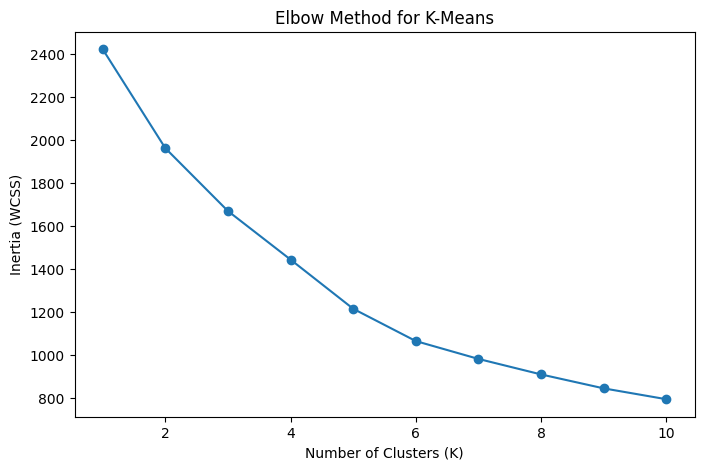

In [ ]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for K-Means")
plt.show()


In [3]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster_KMeans"] = clusters

print("Cluster distribution:")
print(df["Cluster_KMeans"].value_counts())


Cluster distribution:
Cluster_KMeans
1    186
0    117
Name: count, dtype: int64


K-Means ARI vs Target: 0.429
K-Means Silhouette Score: 0.265


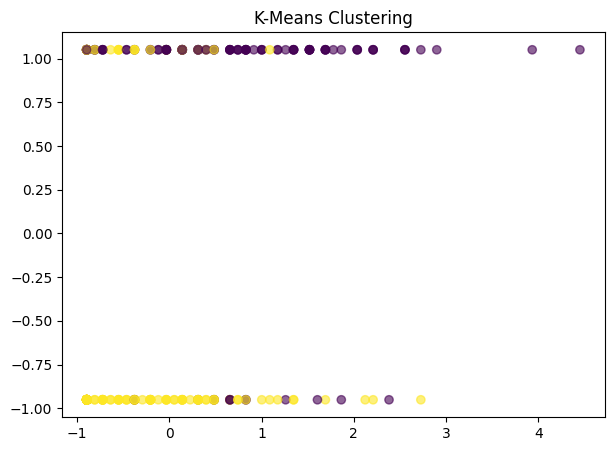

In [4]:
# Adjusted Rand Index (how well clusters match true labels)
ari = adjusted_rand_score(y, clusters)

# Silhouette Score (how well-separated clusters are)
sil = silhouette_score(X_scaled, clusters)

print(f"K-Means ARI vs Target: {ari:.3f}")
print(f"K-Means Silhouette Score: {sil:.3f}")

# Scatter plot (using first 2 features)
plt.figure(figsize=(7,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="viridis", alpha=0.6)
plt.title("K-Means Clustering")
plt.show()


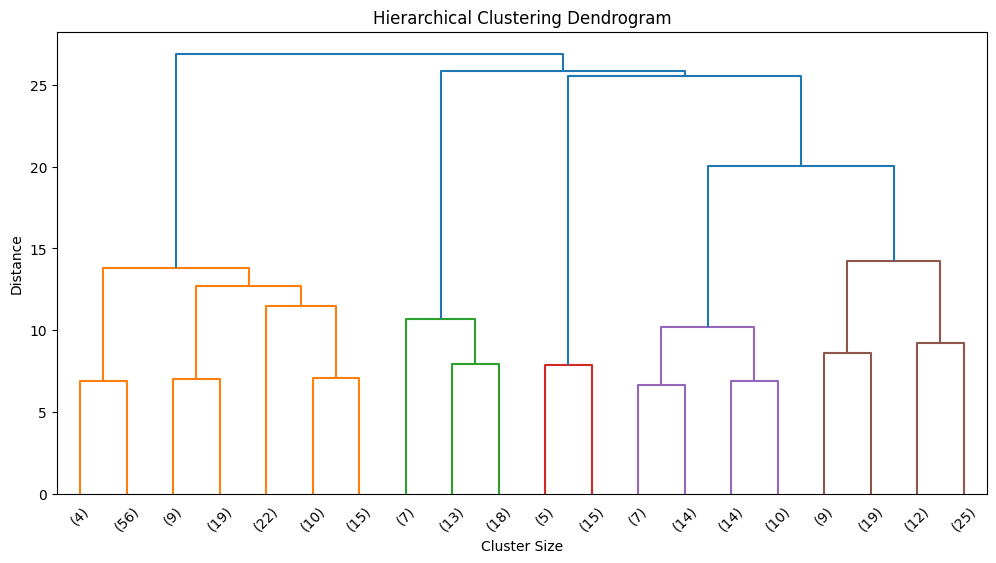

In [5]:
# Perform linkage
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [6]:
clusters_hier = fcluster(Z, t=2, criterion="maxclust")
df["Cluster_Hier"] = clusters_hier

print("Hierarchical Clustering Distribution:")
print(df["Cluster_Hier"].value_counts())

# Compare with target
ari_hier = adjusted_rand_score(y, clusters_hier)
print(f"Hierarchical Clustering ARI vs Target: {ari_hier:.3f}")


Hierarchical Clustering Distribution:
Cluster_Hier
2    168
1    135
Name: count, dtype: int64
Hierarchical Clustering ARI vs Target: 0.294
